In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
os.chdir('..')
import prosumpy as pros




## Load example demand and photovoltaic profile

In [2]:


demand = pd.read_csv('./tests/data/demand_example.csv', index_col=0, header=None, parse_dates=True, squeeze=True)
pv_1kW = pd.read_csv('./tests/data/pv_example.csv', index_col=0, header=None, parse_dates=True, squeeze=True)


## Dispatch

We define some technical parameters needed for the dispatch

In [3]:
pv_size = 10

param_tech = {'BatteryCapacity': 20,
             'outEfficiency': .95,
             'inEfficiency': .95,
                  'maxChargePower': 10,
                  'maxDischargePower': 10,
                 'timestep': 0.25,
                 }

pv = pv_1kW * pv_size
p1 = demand-pv

The photovoltaic and battery installation is covering the energy demand based on a given operation strategy. 

### Operation strategy 1
In this case the algorithm tries to maximize the self consumption.

In [4]:
p1.describe()

count    35040.000000
mean        -0.747486
std          2.992381
min         -9.641317
25%         -2.132295
50%          0.200721
75%          0.710277
max         28.500353
Name: 1, dtype: float64

In [5]:
E1 = pros.dispatch_only_meter_sc(p1, param_tech, return_series=False)

The solution is a dictionary that contains all energy flows:

In [6]:
E1.keys()
print(E1['LevelOfCharge'].head())
print(E1['LevelOfCharge'])

0
2014-01-01 00:00:00    10.000000
2014-01-01 00:15:00    10.209091
2014-01-01 00:30:00    10.441828
2014-01-01 00:45:00    10.618860
2014-01-01 01:00:00    10.715436
dtype: float64
0
2014-01-01 00:00:00    10.000000
2014-01-01 00:15:00    10.209091
2014-01-01 00:30:00    10.441828
2014-01-01 00:45:00    10.618860
2014-01-01 01:00:00    10.715436
2014-01-01 01:15:00    10.793697
2014-01-01 01:30:00    11.302309
2014-01-01 01:45:00    12.222976
2014-01-01 02:00:00    12.366605
2014-01-01 02:15:00    12.727624
2014-01-01 02:30:00    12.824248
2014-01-01 02:45:00    12.916476
2014-01-01 03:00:00    13.236808
2014-01-01 03:15:00    13.808587
2014-01-01 03:30:00    14.373029
2014-01-01 03:45:00    14.792424
2014-01-01 04:00:00    15.044529
2014-01-01 04:15:00    15.423907
2014-01-01 04:30:00    15.575353
2014-01-01 04:45:00    15.630015
2014-01-01 05:00:00    15.669981
2014-01-01 05:15:00    15.804457
2014-01-01 05:30:00    15.858198
2014-01-01 05:45:00    15.959716
2014-01-01 06:00:00    1

#### Inspect results of strategy 1

We can have a quick overview on the results

In [7]:
#pros.print_analysis_meter(pv, demand, param_tech, E1)

AttributeError: module 'prosumpy' has no attribute 'print_analysis_meter'

We can inspect the dispatch by plotting the energy flows of any given week 

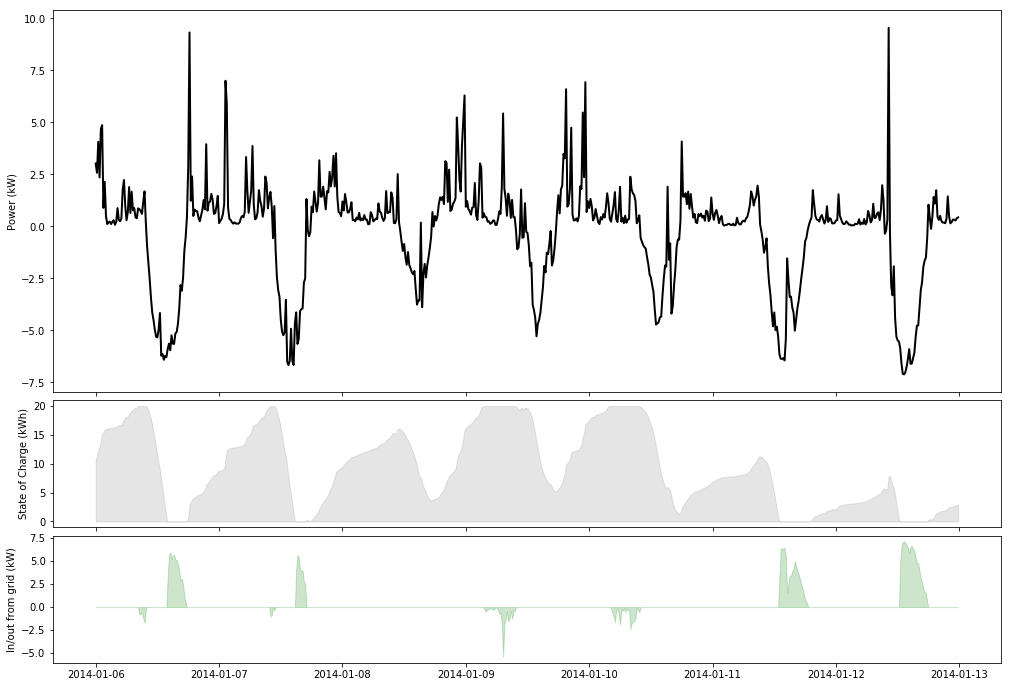

In [8]:
pros.plot_onlyGrid(p1, E1, week=2)

### Operation stratetegy # 2
The use of battery for every day is preoptimized assuming perfect forecast of the demand. The advantage of this strategy is that it avoids sudden sudden power injections to the grid.

In [ ]:
E2 = pros.dispatch_max_sc_grid_pf(pv, demand, param_tech)


### Inspect results of strategy 2

In [ ]:
pros.plot_dispatch(pv, demand, E2, week=2)

In [ ]:
pros.print_analysis(pv, demand, param_tech, E2)